# $\color{red}{Deep \ \ Neural \ \ Network \ \ on \ \ MNIST \ \ Dataset}$

# $Training \ \ Data$

## $Import \ \ Basic \ \ Libraries$

In [1]:
import pandas as pd  # For handling and analyzing structured data
import numpy as np  # For numerical operations and array handling
from matplotlib import pyplot as plt  # For data visualization and plotting

## $Import \ \ Training \ \ Data$

In [2]:
df = pd.read_csv("/content/train.csv")  # Load the dataset from a CSV file into a DataFrame
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data = np.array(df)  # Convert the DataFrame into a NumPy array for easier manipulation
m, n = df.shape
print("No. of Examples :", m)
print("No. of Features(Pixels) :", n)

No. of Examples : 42000
No. of Features(Pixels) : 785


## $Data \ \ Modeling$

In [4]:
np.random.shuffle(data)  # Shuffle the data to ensure randomness
m_train = int(m * 0.8)  # Use 80% of the data for training
print("No. of training examples :", m_train)

# Split training data and transpose for easier manipulation
train_data = data[0:m_train].T  # Transpose train data
X_train = train_data[1:n]  # Extract features (all rows except the first)
X_train = X_train / 255  # Normalize feature values to [0, 1]
Y_train = train_data[0]  # Extract labels (first row)
print("X_train Shape :", X_train.shape)
print("Y_train Shape :", Y_train.shape)

print()

# Prepare test data (remaining 20%)
print("No. of testing examples :", m - m_train)
test_data = data[m_train:].T  # Transpose test data
X_test = test_data[1:n]  # Extract test features
X_test = X_test / 255  # Normalize test features
Y_test = test_data[0]  # Extract test labels
print("X_test Shape :", X_test.shape)
print("Y_test Shape :", Y_test.shape)

No. of training examples : 33600
X_train Shape : (784, 33600)
Y_train Shape : (33600,)

No. of testing examples : 8400
X_test Shape : (784, 8400)
Y_test Shape : (8400,)


# $Weights \ \ \& \ \ Biases$

## $Initiate \ \ Weights \ \ \& \ \ Biases$

In [5]:
# Initialize Weights and Biases
def initialize_weights_biases(layers_dims):
    """
    Initializes weights and biases for each layer in the network.
    Args:
        layers_dims (list): List specifying the number of neurons in each layer.
    Returns:
        dict: Dictionary containing initialized weights and biases.
    """
    np.random.seed(1)  # Seed for reproducibility
    weights_biases = {}
    L = len(layers_dims)  # Number of layers in the network

    for l in range(1, L):
        # Initialization for weights to maintain gradient flow
        weights_biases['W' + str(l)] = np.random.randn(layers_dims[l], layers_dims[l-1]) / np.sqrt(layers_dims[l-1])
        # Initialize biases as zeros
        weights_biases['b' + str(l)] = np.zeros((layers_dims[l], 1))

    return weights_biases

In [6]:
# @title $Initiate \ \ Weights \ \ \& \ \ Biases$ {"form-width":"20%"}
# Import sympy and display, Math for Latex format
import sympy as sp
from IPython.display import display, Math

# Input layer and hidden layer sizes as a string
Layers_dims = "100,30,20" # @param {"type":"string","placeholder":"Enter sizes of hidden layers"}
Layers_dims = [int(i) for i in Layers_dims.split(",")]  # Convert layer sizes to a list of integers
Layers_dims.insert(0, 784)  # Add input layer size (784 for MNIST data)
Layers_dims.append(10)  # Add output layer size (10 classes for MNIST)

# Initialize weights and biases for the specified layer dimensions
weights_biases_check = initialize_weights_biases(Layers_dims)
display(Math("\large{Initiate \ \ weights \ \ \& \ \ biases \ \ for \ \ layers :" + sp.latex(Layers_dims) +r"}"))
print("\n")

# Determine the number of layers in the network
L = len(weights_biases_check)//2  # Each layer has a weight and bias, hence divide by 2
for i in range(1, L+1):
    # Display weights and biases for each layer in mathematical format
    display(Math("\large{Weights \ \ and \ \ Baises \ \ at \ \ Layer \ " + sp.latex(i) +r"}"))

    # Format weights for display with shape information
    W_check = weights_biases_check["W" + str(i)]
    expr_W_check = r"\Huge{[} \Large{W^{[" +sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(W_check.shape) + r"}}}"

    # Format biases for display with shape information
    b_check = weights_biases_check["b" + str(i)]
    expr_b_check = r"\Huge{[} \Large{b^{[" +sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(b_check.shape) + r"}}}"

    # Display weights and biases in LaTeX format
    display(Math(expr_W_check +r" \ \ \ \& \ \ \ \ \ \ " + expr_b_check))

    print("\n")  # Add spacing for readability


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# $Activation \ \ Functions$

In [7]:
# ReLU activation function
def ReLU(Z):
    # Applies ReLU activation: sets negative values to 0, retains positive values
    return np.maximum(0, Z)

# Softmax activation function
def softmax(Z):
    # Applies softmax to convert logits into probabilities
    A = np.exp(Z) / sum(np.exp(Z))  # Normalizes exponentials of inputs
    return A

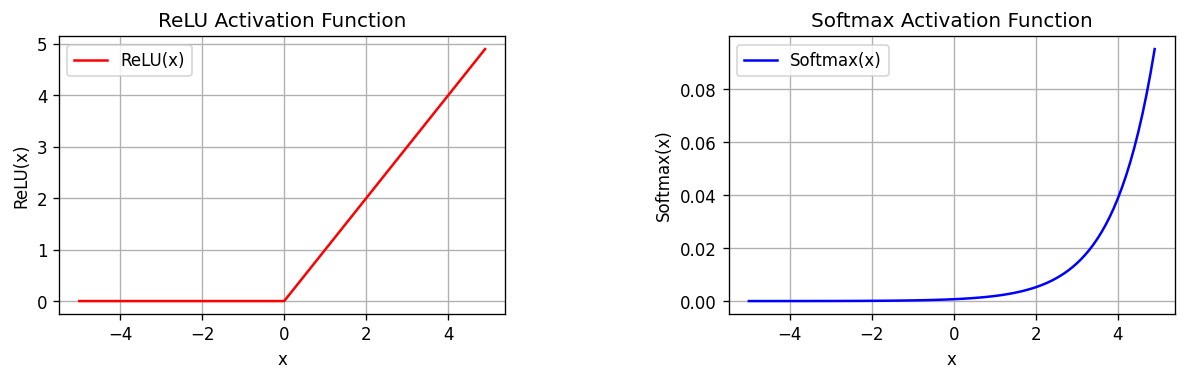

In [8]:
# @title $Visualize \ \ ReLU \ \ \& \ \ Softmax \ \ Activation \ \ Functions$
# Generate data
x_plot = np.arange(-5, 5, 0.1)
relu_y = ReLU(x_plot)
softmax_y = softmax(x_plot)

# Create subplots with increased space between plots
fig, axes = plt.subplots(1, 2, figsize=(12, 3), dpi=120, gridspec_kw={'wspace': 0.5})  # Increase wspace

# Plot ReLU function
axes[0].plot(x_plot, relu_y, color='red', label="ReLU(x)")
axes[0].set_xlabel('x')
axes[0].set_ylabel('ReLU(x)')
axes[0].set_title('ReLU Activation Function')
axes[0].grid(True)
axes[0].legend()

# Plot Softmax function
axes[1].plot(x_plot, softmax_y, color='blue', label="Softmax(x)")
axes[1].set_xlabel('x')
axes[1].set_ylabel('Softmax(x)')
axes[1].set_title('Softmax Activation Function')
axes[1].grid(True)
axes[1].legend()

# Display the plots
plt.show()

# $Forward \ \ Propogation$

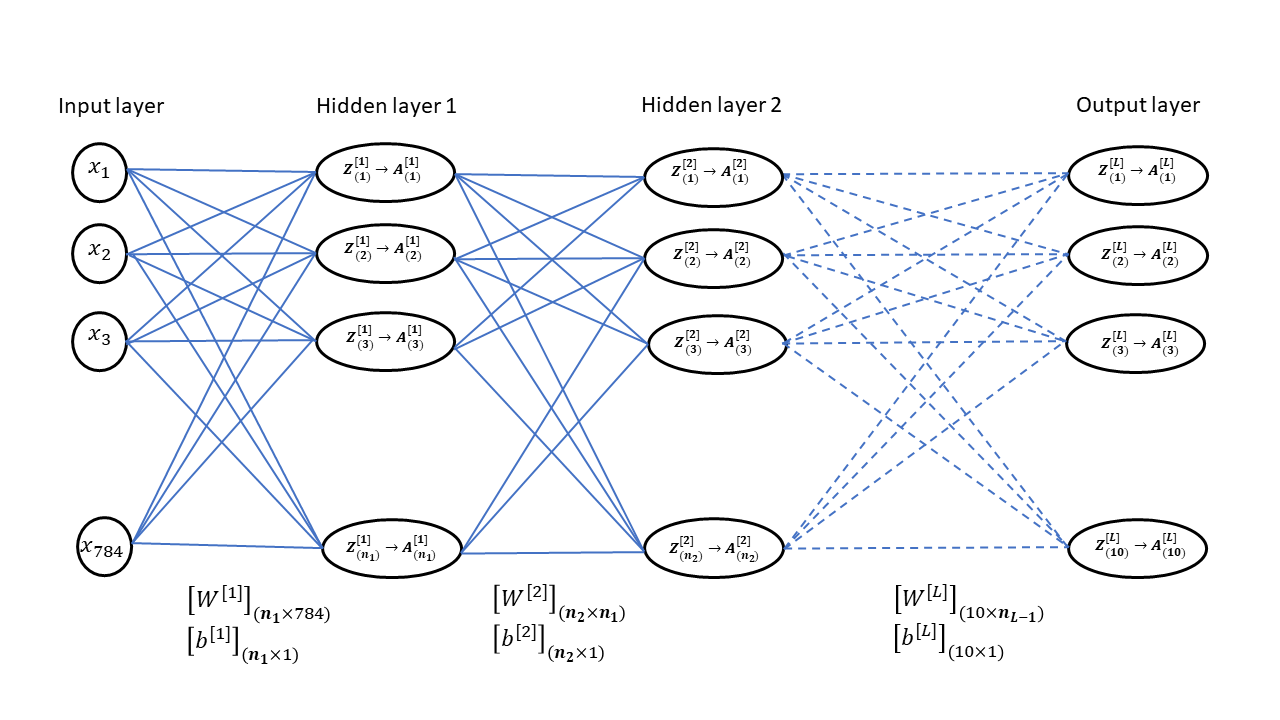

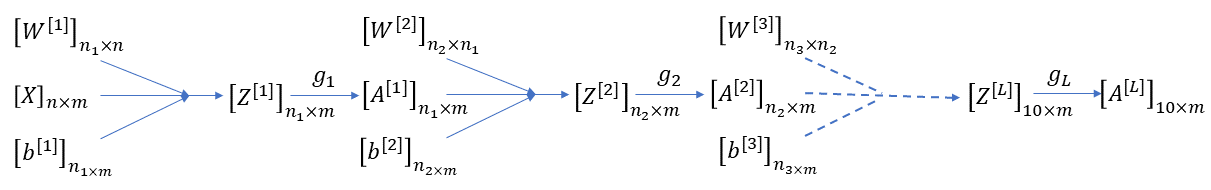

In [9]:
# Forward Propagation
def forward_prop(weights_biases, X):
    """
    Computes forward propagation through the network.
    Args:
        weights_biases (dict): Current weights and biases.
        X (ndarray): Input data.
    Returns:
        dict: Activations and pre-activations for each layer.
    """
    L = len(weights_biases) // 2  # Number of layers
    LNLcaches = {"A0": X}  # Initialize cache to store activations and pre-activations

    A = X  # Set input as initial activation
    for l in range(1, L):
        Z = weights_biases["W" + str(l)].dot(A) + weights_biases["b" + str(l)]  # Linear transformation
        A = ReLU(Z)  # Apply ReLU activation for hidden layers
        LNLcaches["Z" + str(l)] = Z  # Store pre-activation
        LNLcaches["A" + str(l)] = A  # Store activation

    # Compute output layer
    Z = weights_biases["W" + str(L)].dot(A) + weights_biases["b" + str(L)]  # Linear transformation for output
    A = softmax(Z)  # Apply softmax activation for output layer
    LNLcaches["Z" + str(L)] = Z  # Store pre-activation for output
    LNLcaches["A" + str(L)] = A  # Store final output activation

    return LNLcaches  # Return all layer activations and pre-activations

In [10]:
# @title $Forward \ \ Propogation$
LNLcaches_check = forward_prop(weights_biases_check, X_train)  # Perform forward propagation and store intermediate results

for i in range(1, L+1):  # Loop through each layer
    W = weights_biases_check["W" + str(i)]  # Weights of the current layer
    b = weights_biases_check["b" + str(i)]  # Biases of the current layer
    Z = LNLcaches_check["Z" + str(i)]  # Linear transformation output of the current layer
    A = LNLcaches_check["A" + str(i-1)]  # Activation input for the current layer

    # Format weights, biases, and activations for LaTeX display
    expr_W = r"\Huge{[} \Large{W^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(W.shape) + r"}}}"
    expr_b = r"\Huge{[}" + r"\Large{[b^{[" + sp.latex(i) + r"]}]_{_{" + sp.latex(b.shape) + r"}}" + r"[b^{[" + sp.latex(i) + r"]}}]_{_{" + sp.latex(b.shape) + r"}}"
    expr_b = expr_b + r"\cdots" + r"[b^{[" + sp.latex(i) + r"]}]_{_{" + sp.latex(b.shape) + r"}}" + r"\Huge{]} \Large{_{_{" + sp.latex(Z.shape) + r"}}}"

    # Format activation for layer input (X for the first layer, A for subsequent layers)
    if(i == 1):
        expr_A = r"\Huge{[} \Large{X} \Huge{]} \Large{_{_{" + sp.latex(A.shape) + r"}}}"
    else:
        expr_A = r"\Huge{[} \Large{A^{[" + sp.latex(i-1) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(A.shape) + r"}}}"

    # Format Z (linear transformation output)
    expr_Z = r"\Huge{[} \Large{Z^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(Z.shape) + r"}}}"

    # Display text indicating layer transition
    if(i == 1):
        display(Math(r"\color{red}{\large{from \ \ Input \ \ Layer \ \ to \ \ Hidden \ \ Layer \ 1}}"))
    elif(i == L):
        display(Math(r"\color{red}{\large{from \ \ Hidden \ \ Layer \ " + sp.latex(i-1) + r" \ \ to \ \ Output \ \ Layer}}"))
    else:
        display(Math(r"\color{red}{\large{from \ \ Hidden \ \ Layer \ " + sp.latex(i-1) + r" \ \ to \ \ Hidden \ \ Layer \ " + sp.latex(i) + r"}}"))

    # Display the linear transformation equation
    display(Math(r"\Large{" + expr_W + expr_A + r" + " + expr_b + r" = " + expr_Z + r"}"))
    print()

    # Calculate activation for the current layer
    A_next = LNLcaches_check["A" + str(i)]  # Activation output of the current layer
    expr_A_next = r"\Huge{[} \Large{A^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(A_next.shape) + r"}}}"

    # Apply ReLU activation for hidden layers and softmax for the output layer
    if(i < L):
        display(Math(r"\Large{" + expr_A_next + r" = ReLU \left(" + expr_Z + r"\right)}"))
    else:
        display(Math(r"\Large{" + expr_A_next + r" = softmax \left(" + expr_Z + r"\right)}"))

    print("\n")  # Add spacing between layer outputs

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# $Cost$

$For \ a \ single \ example, \ the \ cross-entropy \ loss \ is:$

${L = - \sum_{i=1}^{10} y_i \cdot log \left( \hat{y_i} \right)}$

$\large{\therefore Cost(J) = \sum_{j=1}^{m} \left( - \sum_{i=1}^{10} y_i \cdot log \left( \hat{y_i} \right) \right)}$

In [11]:
# One-Hot encode target column
def one_hot(Y):
    """
    Converts target labels into one-hot encoded format.
    Args:
        Y (ndarray): Array of target labels.
    Returns:
        ndarray: One-hot encoded representation of Y.
    """
    one_hot_Y = np.zeros((Y.size, Y.max() + 1))  # Initialize a zero matrix of shape (num_samples, num_classes)
    one_hot_Y[np.arange(Y.size), Y] = 1  # Set the corresponding class index to 1 for each sample
    one_hot_Y = one_hot_Y.T  # Transpose to match expected shape (num_classes, num_samples)
    return one_hot_Y

# Cross-Entropy loss
def compute_loss(AL, Y):
    """
    Computes cross-entropy loss.
    Args:
        AL (ndarray): Output layer activations (softmax probabilities).
        Y (ndarray): True labels.
    Returns:
        float: Cross-entropy loss.
    """
    m = Y.size  # Number of examples
    one_hot_Y = one_hot(Y)  # One-hot encode the true labels
    loss = -np.sum(one_hot_Y * np.log(AL + 1e-8)) / m  # Compute cross-entropy loss with numerical stability (epsilon)
    return loss  # Return the calculated loss

In [12]:
# @title $Cost$

# Shape of output layer matches the shape of one-hot encoded target labels
expr1 = r"\Huge{[} \Large{Y_{one-hot}} \Huge{]} \Large{_{_{" + sp.latex(LNLcaches_check["A" + str(L)].shape) + r"}} \ast \ log}" + expr_A_next
expr1 = expr1 + r"\large{ = } \Huge{[} \large{y_{ij} \cdot log(a_{ij})} \Huge{]} \Large{_{_{" + sp.latex(LNLcaches_check["A" + str(L)].shape) + r"}}}"
display(Math(expr1))  # Display the mathematical representation of the cost function

print("\n")

# Summation-based formula for cost computation (cross-entropy loss)
expr2 = r"\Large{Cost (J) = -\sum_{j=1}^{" + sp.latex(int(m*0.8)) + "} \sum_{i=1}^{10} y_{ij} \cdot log(a_{ij})}"
display(Math(expr2))  # Display the cost function formula in LaTeX

# Generate one-hot encoded labels
one_hot_Y = one_hot(Y_train)

# Compute the actual cost value using the network's predictions and true labels
cost = compute_loss(LNLcaches_check["A" + str(L)], Y_train)

print()
# Display the computed cost value
display(Math("\large{Cost(J) =" + sp.latex(cost) +r"}"))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# $Gradient \ \ Descent$

## $\color{red}{For \ \ Layer \ \ L}$

### $Derivative \ of \ J \ w.r.t. \ Z^{[L]}:$

$\large{dZ^{[L]} = \Large{\frac{dJ}{dZ^{[L]}} = \frac{dJ}{dA^{[L]}} \frac{dA^{[L]}}{dZ^{[L]}}}}$

$\Large{\therefore \ \color{blue}{dZ^{[L]} = \left[A^{[L]}-Y\right]}}$

$Now \ \ as, \ \large{[Z^{[L]}]_{10 \times m} = [W^{[L]}]_{10 \times n_{_{L-1}}} [A^{[L-1]}]_{n_{_{L-1}} \times m} + [b^{[L]}]_{10 \times 1}}$

$\Large{\Rightarrow \frac{\partial Z^{[L]}}{\partial W^{[L]}} = \left[A^{[L-1]}\right]} \ \ ; \ \ \ \ \Large{\frac{\partial Z^{[L]}}{\partial b^{[L]}} = \left[1\right] \ \ and \ \ \ \ \Large{\frac{\partial Z^{[L]}}{\partial A^{[L-1]}} = \left[W^{[L]}\right]}}$

$and, \ \Large{\frac{\partial J}{\partial W^{[L]}} = \frac{dJ}{dZ^{[L]}} \frac{\partial Z^{[L]}}{\partial W^{[L]}}}$

$\large{\therefore \color{blue}{\left[ dW^{[L]} \right]_{10 \times n_{_{L-1}}} =\frac{\partial J}{\partial W^{[L]}} = \frac{1}{m} \left(\left[dZ^{[L]}\right]_{10 \times m} \left[A^{{[L-1]}^T}\right]_{m \times n_{_{L-1}}} \right)}}$

$also, \ \Large{\frac{\partial J}{\partial b^{[L]}} = \frac{dJ}{dZ^{[L]}} \frac{\partial Z^{[L]}}{\partial b^{[L]}}}$

$\large{\therefore \color{blue}{\left[ db^{[L]} \right]_{10 \times 1} =\frac{\partial J}{\partial b^{[L]}} = \frac{1}{m} \left(\left[dZ^{[L]}\right]_{10 \times m} \left[1^T\right]_{m \times 1} \right)}}$

## $\color{red}{For \ \ Layer \ \ l < L}$

$As,$
$\large{Z^{[l]} = W^{[l]}A^{[l-1]} + b^{[l]}}$

$\Large{\Rightarrow \frac{\partial Z^{[l]}}{\partial W^{[l]}} = \left[A^{[l-1]}\right]_{(n_{_{l-1}} \times m)}} \ \ ; \ \ \ \ \Large{\frac{\partial Z^{[l]}}{\partial b^{[l]}} = \left[1\right]_{(n_{_{l}} \times 1)} \ \ and \ \ \ \ \Large{\frac{\partial Z^{[l]}}{\partial A^{[l-1]}} = \left[W^{[l]}\right]_{(n_{_{l}} \times n_{_{l-1}})}}}$

$\therefore \color{blue}{\large{dZ^{[l]} = \Large{\frac{dJ}{dZ^{[l]}} = \frac{d J}{d Z^{[l+1]}} \frac{\partial Z^{[l+1]}}{\partial A^{[l]}} \frac{dA^{[l]}}{dZ^{l}}}} = \large{dZ^{[l+1]} \cdot W^{[l+1]}} \cdot \Large{\frac{dA^{[l]}}{dZ^{l}}}}$

### $for \ \ ReLu \ \ Activation \ \ function$

$\color{}{\large{A^{[l]} = ReLu \left(Z^{[l]} \right)} = max\left(0,z\right)}$


$\Rightarrow \Large{\frac{dA^{[l]}}{dZ^{[l]}}}=\large{\left\{ \begin{array}{cl}
1 & : \ z > 0 \\
0 & : \ z \leq 0
\end{array} \right.}$

$\therefore \color{blue}{\large{dZ^{[l]} = \Large{\frac{dJ}{dZ^{[l]}} =\large{\left\{ \begin{array}{cl}
\large{dZ^{[l+1]} \cdot W^{[l+1]}} & : \ z > 0 \\
0 & : \ z \leq 0
\end{array} \right.} }}}$

$and, \Large{\frac{\partial J}{\partial W^{[l]}} = \frac{d J}{dZ^{[l]}} \frac{\partial Z^{[l]}}{\partial W^{[l]}}}$

$\large{\therefore \color{blue}{\left[ dW^{[l]} \right]_{(1 \times 4)} =\frac{\partial J}{\partial W^{[l]}} = \frac{1}{m} \left(\left[dZ^{[l]}\right]_{(1 \times m)} \left[A^{{[l-1]}^T}\right]_{(m \times 4)} \right)}}$

$also, \ \Large{\frac{\partial J}{\partial b^{[l]}} = \frac{dJ}{dZ^{[l]}} \frac{\partial Z^{[l]}}{\partial b^{[l]}}}$

$\large{\therefore \color{blue}{\left[ db^{[l]} \right]_{(1 \times 1)} =\frac{\partial J}{\partial b^{[l]}} = \frac{1}{m} \left(\left[dZ^{[l]}\right]_{(1 \times m)} \left[1^T\right]_{(m \times 1)} \right)}}$

# $Backward \ \ Propogation$

In [13]:
def deriv_ReLU(Z):
    # Derivative of ReLU: 1 for positive values, 0 for negative values
    return Z > 0

def back_prop(LNLcaches, weights_biases, X, Y):
    """
    Performs backpropagation to compute gradients of weights and biases.
    Args:
        LNLcaches (dict): Cache from forward propagation containing activations and pre-activations.
        weights_biases (dict): Current weights and biases.
        X (ndarray): Input data.
        Y (ndarray): True labels.
    Returns:
        dict: Gradients for weights and biases.
    """
    L = len(weights_biases) // 2  # Number of layers
    m = Y.size  # Number of examples
    one_hot_Y = one_hot(Y)  # Convert true labels to one-hot encoding
    grads = {}  # Dictionary to store gradients

    # Output layer gradients
    dZL = LNLcaches["A" + str(L)] - one_hot_Y  # Derivative of loss w.r.t. ZL
    grads["dZ" + str(L)] = dZL
    dWL = 1 / m * dZL.dot(LNLcaches["A" + str(L-1)].T)  # Gradient of weights for output layer
    grads["dW" + str(L)] = dWL
    dbL = 1 / m * np.sum(dZL, axis=1).reshape(-1, 1)  # Gradient of biases for output layer
    grads["db" + str(L)] = dbL

    # Gradients for hidden layers
    for l in reversed(range(1, L)):
        dZl = weights_biases["W" + str(l + 1)].T.dot(grads["dZ" + str(l + 1)]) * deriv_ReLU(LNLcaches["Z" + str(l)])
        grads["dZ" + str(l)] = dZl
        dWl = 1 / m * dZl.dot(LNLcaches["A" + str(l-1)].T)  # Gradient of weights for layer l
        grads["dW" + str(l)] = dWl
        dbl = 1 / m * np.sum(dZl, axis=1).reshape(-1, 1)  # Gradient of biases for layer l
        grads["db" + str(l)] = dbl

    return grads  # Return computed gradients

def update_params(weights_biases, grads, alpha):
    """
    Updates weights and biases using gradient descent.
    Args:
        weights_biases (dict): Current weights and biases.
        grads (dict): Gradients for weights and biases.
        alpha (float): Learning rate.
    Returns:
        dict: Updated weights and biases.
    """
    L = len(weights_biases) // 2  # Number of layers
    for l in range(1, L + 1):
        # Update weights and biases using gradients
        weights_biases["W" + str(l)] -= alpha * grads["dW" + str(l)]
        weights_biases["b" + str(l)] -= alpha * grads["db" + str(l)]

    return weights_biases  # Return updated parameters

def get_predictions(AL):
    """
    Converts output probabilities into predicted labels.
    Args:
        AL (ndarray): Output probabilities from the softmax layer.
    Returns:
        ndarray: Predicted labels (class indices with highest probability).
    """
    return np.argmax(AL, 0)  # Returns index of maximum probability for each example.

def get_accuracy(predictions, Y):
    """
    Computes accuracy by comparing predictions to true labels.
    Args:
        predictions (ndarray): Predicted labels.
        Y (ndarray): True labels.
    Returns:
        float: Accuracy as the proportion of correct predictions.
    """
    return np.sum(predictions == Y) / Y.size  # Proportion of correct predictions.

def gradient_descent(X, Y, iterations, alpha, layers_dims):
    """
    Trains the neural network using gradient descent.
    Args:
        X (ndarray): Input data.
        Y (ndarray): True labels.
        iterations (int): Number of training iterations.
        alpha (float): Learning rate.
        layers_dims (list): List specifying the number of neurons in each layer.
    Returns:
        dict: Trained weights and biases.
    """
    weights_biases = initialize_weights_biases(layers_dims)  # Initialize weights and biases
    L = len(weights_biases) // 2  # Number of layers

    for i in range(iterations):
        LNLcaches = forward_prop(weights_biases, X)  # Perform forward propagation
        grads = back_prop(LNLcaches, weights_biases, X, Y)  # Compute gradients using backpropagation
        weights_biases = update_params(weights_biases, grads, alpha)  # Update parameters

        if (i + 1) % 10 == 0:  # Display accuracy every 10 iterations
            print("Iteration :", i + 1)
            predictions = get_predictions(LNLcaches["A" + str(L)])
            print("Loss :",compute_loss(LNLcaches["A" + str(L)], Y))
            print("Accuracy :", get_accuracy(predictions, Y))
            print()


    return weights_biases, LNLcaches,grads  # Return final trained parameters

In [14]:
# @title $Backward \ \ Propogation$
weights_biases, LNLcaches, grads = gradient_descent(X_train, Y_train, 1, 0.1, Layers_dims)
# Compute and display gradients for the output layer
display(Math(r"\color{red}{\Large{Gradients \ \ at \ \ Output \ \ Layer}}"))
# Gradient of the loss with respect to Z (output layer pre-activation)
dZL_expr = r"\Huge{[} \Large{dZ^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(L)].shape) + r"}}} \Large{ = }"
dZL_expr = dZL_expr + r"\Huge{[} \Large{A^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(LNLcaches["A" + str(L)].shape) + r"}}} - \Huge{[} \Large{Y_{one-hot}} \Huge{]} \Large{_{_{" + sp.latex(LNLcaches["A" + str(L)].shape) + r"}}}"
display(Math(dZL_expr))

print()

# Gradient of weights at the output layer
dWL_expr = r"\Huge{[} \Large{dW^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dW"+str(L)].shape) + r"}}} \large{= \frac{1}{" +sp.latex(int(m*0.8))+ r"}}"
dWL_expr = dWL_expr + r"\Huge{(} \Huge{[} \Large{dZ^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(L)].shape) + r"}}}"
dWL_expr = dWL_expr + r"\Huge{[} \Large{A^{[" + sp.latex(L-1) + r"]}} \Huge{]^{^{\large{T}}}} \Large{_{_{" + sp.latex(LNLcaches["A" + str(L-1)].shape[::-1]) + r"}}}" + r"\Huge{)}"
display(Math(dWL_expr))

print()

# Gradient of biases at the output layer
dbL_expr = r"\Huge{[} \Large{db^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["db"+str(L)].shape) + r"}}} \large{= \frac{1}{" +sp.latex(int(m*0.8))+ r"}}"
dbL_expr = dbL_expr + r"\Huge{(} \Huge{[} \Large{dZ^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(L)].shape) + r"}}}"
dbL_expr = dbL_expr + r"\Huge{[} \Large{1} \Huge{]} \Large{_{_{ (" + sp.latex(int(m*0.8)) + r",1) }}}" + r"\Huge{)}"
display(Math(dbL_expr))

print("\n")

# Update weights and biases at the output layer
display(Math("\color{blue}{\large{Update \ \ Weights (W^{["+ sp.latex(L) +r"]}) \ and \ Biases (b^{["+ sp.latex(L) +r"]})}}"))

# Weight update formula
W_expr = r"\Huge{[} \Large{W^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["W" + str(L)].shape) + r"}}} \Large{=}"
W_expr = W_expr + r"\Huge{[} \Large{W^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["W" + str(L)].shape) + r"}}} \Large{- \alpha \ \cdot}"
W_expr = W_expr + r"\Huge{[} \Large{dW^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dW"+str(L)].shape) + r"}}}"
display(Math(W_expr))

print()

# Bias update formula
b_expr = r"\Huge{[} \Large{b^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["b" + str(L)].shape) + r"}}} \Large{=}"
b_expr = b_expr + r"\Huge{[} \Large{b^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["b" + str(L)].shape) + r"}}} \Large{- \alpha \ \cdot}"
b_expr = b_expr + r"\Huge{[} \Large{db^{[" + sp.latex(L) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["db"+str(L)].shape) + r"}}}"
display(Math(b_expr))

print("\n")

# Loop for hidden layers (backward propagation through the network)
for i in reversed(range(1, L)):
    display(Math(r"\color{red}{\Large{Gradients \ \ at \ \ Hidden \ \ Layer \ " + sp.latex(i) +r"}}"))

    # Gradients for hidden layer pre-activation
    dZ_expr = r"\Huge{[} \Large{dZ^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(i)].shape) + r"}}=}"
    dZ_expr = dZ_expr + r"\Huge{([} \Large{W^{[" + sp.latex(i+1) + r"]}} \Huge{]^{^{\large{T}}}} \Large{_{_{" + sp.latex(weights_biases["W" + str(i+1)].shape[::-1]) + r"}}}"
    dZ_expr = dZ_expr + r"\Huge{[} \Large{dZ^{[" + sp.latex(i+1) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(i+1)].shape) + r"}}} \Huge{)}"
    dZ_expr = dZ_expr + r"\Large{\ast} \ DerivativeReLU \Huge{([} \Large{Z^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(LNLcaches["Z" + str(i)].shape) + r"}}} \Huge{)}"
    display(Math(dZ_expr))

    print()

    # Gradient of weights at hidden layers
    dW_expr = r"\Huge{[} \Large{dW^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dW"+str(i)].shape) + r"}}} \large{= \frac{1}{" +sp.latex(int(m*0.8))+ r"}}"
    dW_expr = dW_expr + r"\Huge{(} \Huge{[} \Large{dZ^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(i)].shape) + r"}}}"
    dW_expr = dW_expr + r"\Huge{[} \Large{A^{[" + sp.latex(i-1) + r"]}} \Huge{]^{^{\large{T}}}} \Large{_{_{" + sp.latex(LNLcaches["A" + str(i-1)].shape[::-1]) + r"}}}" + r"\Huge{)}"
    display(Math(dW_expr))

    print()

    # Gradient of biases at hidden layers
    db_expr = r"\Huge{[} \Large{db^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["db"+str(i)].shape) + r"}}} \large{= \frac{1}{" +sp.latex(int(m*0.8))+ r"}}"
    db_expr = db_expr + r"\Huge{(} \Huge{[} \Large{dZ^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dZ"+str(i)].shape) + r"}}}"
    db_expr = db_expr + r"\Huge{[} \Large{1} \Huge{]} \Large{_{_{ (" + sp.latex(int(m*0.8)) + r",1) }}}" + r"\Huge{)}"
    display(Math(db_expr))

    print("\n")

    # Update weights and biases for the current hidden layer
    display(Math("\color{blue}{\large{Update \ \ Weights (W^{["+ sp.latex(i) +r"]}) \ and \ Biases (b^{["+ sp.latex(i) +r"]})}}"))

    W_expr = r"\Huge{[} \Large{W^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["W" + str(i)].shape) + r"}}} \Large{=}"
    W_expr = W_expr + r"\Huge{[} \Large{W^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["W" + str(i)].shape) + r"}}} \Large{- \alpha \ \cdot}"
    W_expr = W_expr + r"\Huge{[} \Large{dW^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["dW"+str(i)].shape) + r"}}}"
    display(Math(W_expr))

    print()

    b_expr = r"\Huge{[} \Large{b^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["b" + str(i)].shape) + r"}}} \Large{=}"
    b_expr = b_expr + r"\Huge{[} \Large{b^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(weights_biases["b" + str(i)].shape) + r"}}} \Large{- \alpha \ \cdot}"
    b_expr = b_expr + r"\Huge{[} \Large{db^{[" + sp.latex(i) + r"]}} \Huge{]} \Large{_{_{" + sp.latex(grads["db"+str(i)].shape) + r"}}}"
    display(Math(b_expr))

    print("\n")

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

# $Train \ \ Deep \ \ Neural \ \ Network \ \ Model$

In [15]:
# Train the neural network using gradient descent
weights_biases, LNLcaches, grads = gradient_descent(X_train, Y_train, 500, 0.1, Layers_dims)
# X_train: Input data, Y_train: True labels, 1000: Iterations, 0.1: Learning rate, [784, 300, 100, 30, 20, 10]: Layer dimensions

Iteration : 10
Loss : 2.1802323346810524
Accuracy : 0.379047619047619

Iteration : 20
Loss : 1.9337379405057784
Accuracy : 0.5168452380952381

Iteration : 30
Loss : 1.579260589046726
Accuracy : 0.5968154761904761

Iteration : 40
Loss : 1.236409588090049
Accuracy : 0.6723511904761905

Iteration : 50
Loss : 1.368005142943014
Accuracy : 0.5313988095238096

Iteration : 60
Loss : 0.8595890948311395
Accuracy : 0.7551190476190476

Iteration : 70
Loss : 0.7886632725443775
Accuracy : 0.7513095238095238

Iteration : 80
Loss : 0.7210542203322603
Accuracy : 0.7735416666666667

Iteration : 90
Loss : 0.6540048113852085
Accuracy : 0.8015178571428572

Iteration : 100
Loss : 0.6482329130804628
Accuracy : 0.79

Iteration : 110
Loss : 0.5626051658754918
Accuracy : 0.8315476190476191

Iteration : 120
Loss : 0.5380832169401654
Accuracy : 0.8407440476190476

Iteration : 130
Loss : 0.509541368649837
Accuracy : 0.8513690476190476

Iteration : 140
Loss : 0.4707428861062164
Accuracy : 0.8647916666666666

Iterat

# $Accuracy \ \ of \ \ Trained \ \ Model$

In [16]:
# Make predictions using the trained model
def make_predictions(X, weights_biases):
    L = len(weights_biases) // 2  # Number of layers in the network
    LNLcaches = forward_prop(weights_biases, X)  # Forward propagation
    predictions = get_predictions(LNLcaches["A" + str(L)])  # Get predicted labels
    return predictions  # Return predicted labels

In [17]:
# Make predictions on the test set and calculate accuracy
Y_pred = make_predictions(X_test, weights_biases)  # Generate predictions for the test data
accuracy = get_accuracy(Y_pred, Y_test)  # Calculate the accuracy by comparing predictions with true labels
print(accuracy)  # Print the accuracy of the model on the test set

0.9258333333333333


# $Make \ \ Predictions \ \ on \ \ Unseen \ \ Data$

In [18]:
# Load and display the first few rows of unseen test data
unseen_data = pd.read_csv("test.csv")  # Read the unseen test data from CSV
unseen_data.head()  # Display the first 5 rows of the unseen data

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# Function to identify an image from the unseen dataset using the trained model
def identify(weights_biases=weights_biases, unseen_data=unseen_data):
    unseen_data = np.array(unseen_data)  # Convert the unseen data to a numpy array
    r = np.random.randint(0, unseen_data.shape[0]-1)  # Randomly select an index from unseen data
    x = unseen_data[r].reshape(-1, 1)  # Reshape the selected image to column vector
    x = x / 255  # Normalize the image

    # Reshape image for visualization and display it
    current_image = x.reshape((28, 28)) * 255  # Reshape back to 28x28 for visualization
    plt.gray()  # Set the color map to grayscale
    plt.imshow(current_image, interpolation='nearest')  # Display the image
    plt.show()  # Show the image

    # Make and print the prediction
    print("This is :", make_predictions(x, weights_biases)[0])  # Output predicted class label

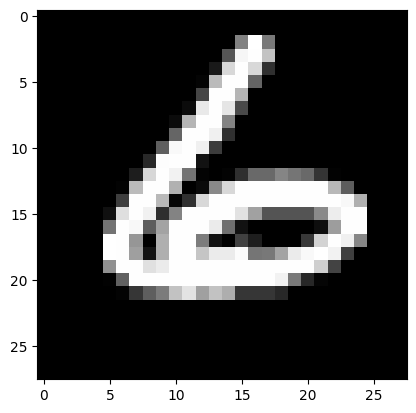

This is : 6


In [24]:
# Call the identify function to randomly select an image from the unseen dataset and make a prediction
identify()